In [29]:
from plots import *
from interpolations import *
from grouping import *

source_names= get_source_names()
source_series = []
excluded_sources = ['direct', 'link']
for exclude in excluded_sources:
    source_names.remove(exclude)
source_series = [get_source_ser('attribution', source_name, 'mean') for source_name in source_names if source_name not in excluded_sources]


ValueError: list.remove(x): x not in list

In [ ]:
# interpolations = []

# for source_ser in source_series:
#     x, y = poly_interp(source_ser)
#     y_new = interp_gradient(x, y)
#     interpolated_data = pd.Series(y_new, index=x)
#     interpolations.append(interpolated_data)

In [ ]:
# Assuming interpolations is a list of pandas Series objects
data = {source_names[i]: source_series[i] for i in range(len(source_names))}
df = pd.DataFrame(data)

# Calculating the correlation matrix
correlation_matrix = df.corr()



27


IndexError: list index out of range

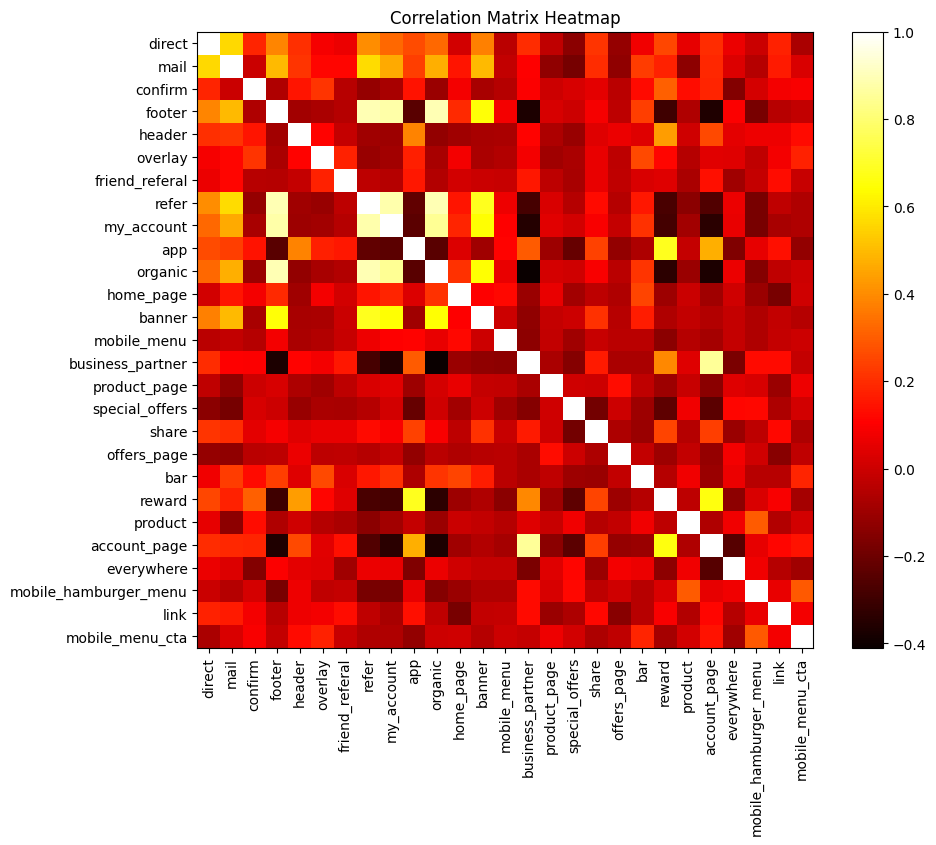

In [ ]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()